## Phylogenetic Tree Construction

A phylogenetic tree provides information about the evolutionary relationships between different species of organisms.

The Biopython suite contains the `DistanceCalculator` and `DistanceTreeConstructor` methods, available from the `TreeConstruction` library, to calculate distance matrices and construct phylogenetic trees, respectively.

For this demonstration, the amino acid sequences of member 1 of voltage-gated potassium channel subfamily A for 11 species, including *Homo sapiens*, were extracted from the NCBI database and aligned using the MEGA (Molecular Evolutionary Genetics Analysis) software. This multiple sequence alignment was saved as a FASTA file, which was used for this demonstration.

In [1]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.9 MB/s eta 0:00:00


In [9]:
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [7]:
import matplotlib, pylab

In [5]:
msa = AlignIO.read('/content/MSA_file.fas', 'fasta')
print(msa)

Alignment with 11 rows and 517 columns
MTVMSG-----------------ENVDEASAAP-GHP---QDGS...TDV A.mel
MTVMSG-----------------ENVDEASAAP-GHP---QEGS...TDV P.tig
MTVMSG-----------------ENVDEASAAP-GHP---QDGS...TDV H.sap
MTVMSG-----------------ENADEASTAP-GHP---QDGS...TDV M.mus
MTVMSG-----------------ENVEEASAAQ-GHP---QDIS...TDV S.har
MTVMAG-----------------ENMDETSALP-GHP---QD-S...TDV E.gar
MTVMAG-----------------ENMDETSALP-GHP---QD-S...TDV M.uni
MDAISGIPSLTAGIDKGQGTGYTDNLNNSHVRPRGQPTLVNKPV...--- S.sal
MDAISGIPSLTAGIDKGQGTGYTDNLNNSHVRPRGQPTLVNKPV...--- P.for
MDAISGIPSLTAGIDKGQGTGYTDNLNNSHVRPRGQPTLVNKPV...--- X.mac
MTVVAG-----------------DNMDETSAVP-GHP---QD-A...TDV N.fur


In [10]:
# This code calculates a distance matrix using the 'identity' model.
# The 'identity' model is the default model that can be used for nucleotide
# and amino acid sequences.

calculator = DistanceCalculator('identity')
dist_mat = calculator.get_distance(msa)
print(dist_mat)

A.mel   0.000000
P.tig   0.009671    0.000000
H.sap   0.015474    0.013540    0.000000
M.mus   0.019342    0.017408    0.015474    0.000000
S.har   0.042553    0.040619    0.042553    0.042553    0.000000
E.gar   0.071567    0.069632    0.073501    0.073501    0.071567    0.000000
M.uni   0.069632    0.067698    0.071567    0.071567    0.069632    0.001934    0.000000
S.sal   0.520309    0.518375    0.516441    0.518375    0.516441    0.516441    0.516441    0.000000
P.for   0.520309    0.518375    0.516441    0.518375    0.516441    0.516441    0.516441    0.000000    0.000000
X.mac   0.520309    0.518375    0.516441    0.518375    0.516441    0.516441    0.516441    0.000000    0.000000    0.000000
N.fur   0.164410    0.160542    0.162476    0.162476    0.156673    0.139265    0.137331    0.514507    0.514507    0.514507    0.000000
    A.mel   P.tig   H.sap   M.mus   S.har   E.gar   M.uni   S.sal   P.for   X.mac   N.fur


In [11]:
dist_mat

DistanceMatrix(names=['A.mel', 'P.tig', 'H.sap', 'M.mus', 'S.har', 'E.gar', 'M.uni', 'S.sal', 'P.for', 'X.mac', 'N.fur'], matrix=[[0], [0.009671179883945835, 0], [0.015473887814313358, 0.013539651837524147, 0], [0.01934235976789167, 0.01740812379110257, 0.015473887814313358, 0], [0.04255319148936165, 0.04061895551257255, 0.04255319148936165, 0.04255319148936165, 0], [0.07156673114119927, 0.06963249516441006, 0.07350096711798837, 0.07350096711798837, 0.07156673114119927, 0], [0.06963249516441006, 0.06769825918762085, 0.07156673114119927, 0.07156673114119927, 0.06963249516441006, 0.0019342359767892114, 0], [0.5203094777562862, 0.5183752417794971, 0.5164410058027079, 0.5183752417794971, 0.5164410058027079, 0.5164410058027079, 0.5164410058027079, 0], [0.5203094777562862, 0.5183752417794971, 0.5164410058027079, 0.5183752417794971, 0.5164410058027079, 0.5164410058027079, 0.5164410058027079, 0.0, 0], [0.5203094777562862, 0.5183752417794971, 0.5164410058027079, 0.5183752417794971, 0.5164410058

In [13]:
# To construct a Neighbour Joining Tree using the raw MSA file

constructor = DistanceTreeConstructor(calculator, 'nj')
nj_tree = constructor.build_tree(msa)
print(nj_tree)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner9')
        Clade(branch_length=0.0029013539651837686, name='Inner7')
            Clade(branch_length=0.005843004513217264, name='A.mel')
            Clade(branch_length=0.0038281753707285707, name='P.tig')
        Clade(branch_length=0.000967117988394571, name='Inner8')
            Clade(branch_length=0.008764506769825934, name='M.mus')
            Clade(branch_length=0.0067093810444874245, name='H.sap')
        Clade(branch_length=0.013902321083172117, name='Inner6')
            Clade(branch_length=0.019946808510638334, name='Inner5')
                Clade(branch_length=0.04076402321083174, name='Inner3')
                    Clade(branch_length=0.07584968223266092, name='N.fur')
                    Clade(branch_length=0.4386570875932578, name='Inner2')
                        Clade(branch_length=0.0, name='X.mac')
                        Clade(branch_length=0.0, name='Inner1')
                            Clade(branch_length=0.0

In [14]:
# To construct the tree using your pre-defined distance matrix

custom_mat_constructor = DistanceTreeConstructor()
custom_mat_nj = custom_mat_constructor.nj(dist_mat)
print(custom_mat_nj)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner9')
        Clade(branch_length=0.0029013539651837686, name='Inner7')
            Clade(branch_length=0.005843004513217264, name='A.mel')
            Clade(branch_length=0.0038281753707285707, name='P.tig')
        Clade(branch_length=0.000967117988394571, name='Inner8')
            Clade(branch_length=0.008764506769825934, name='M.mus')
            Clade(branch_length=0.0067093810444874245, name='H.sap')
        Clade(branch_length=0.013902321083172117, name='Inner6')
            Clade(branch_length=0.019946808510638334, name='Inner5')
                Clade(branch_length=0.04076402321083174, name='Inner3')
                    Clade(branch_length=0.07584968223266092, name='N.fur')
                    Clade(branch_length=0.4386570875932578, name='Inner2')
                        Clade(branch_length=0.0, name='X.mac')
                        Clade(branch_length=0.0, name='Inner1')
                            Clade(branch_length=0.0

In [15]:
# To construct a UPGMA tree using the same matrix

custom_mat_upgma = custom_mat_constructor.upgma(dist_mat)
print(custom_mat_upgma)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner10')
        Clade(branch_length=0.2578427224371373, name='Inner2')
            Clade(branch_length=0.0, name='Inner1')
                Clade(branch_length=0.0, name='X.mac')
                Clade(branch_length=0.0, name='P.for')
            Clade(branch_length=0.0, name='S.sal')
        Clade(branch_length=0.18337463733075432, name='Inner9')
            Clade(branch_length=0.07446808510638298, name='N.fur')
            Clade(branch_length=0.05331237911025147, name='Inner8')
                Clade(branch_length=0.03463491295938103, name='Inner3')
                    Clade(branch_length=0.0009671179883946057, name='M.uni')
                    Clade(branch_length=0.0009671179883946057, name='E.gar')
                Clade(branch_length=0.014446324951644128, name='Inner7')
                    Clade(branch_length=0.021155705996131507, name='S.har')
                    Clade(branch_length=0.012693423597678888, name='Inner6')
            

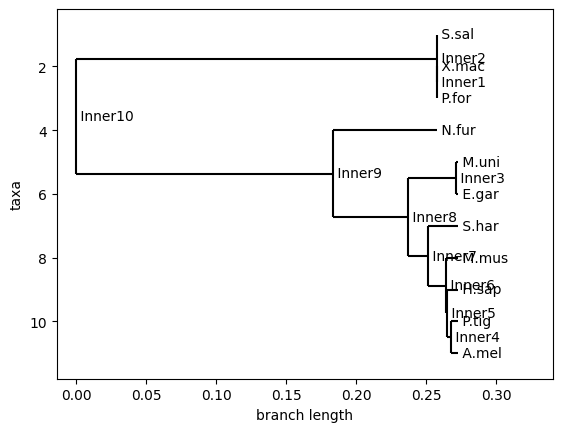

In [20]:
# To visualise a tree using the draw() method

custom_mat_upgma.ladderize()
Phylo.draw(custom_mat_upgma)

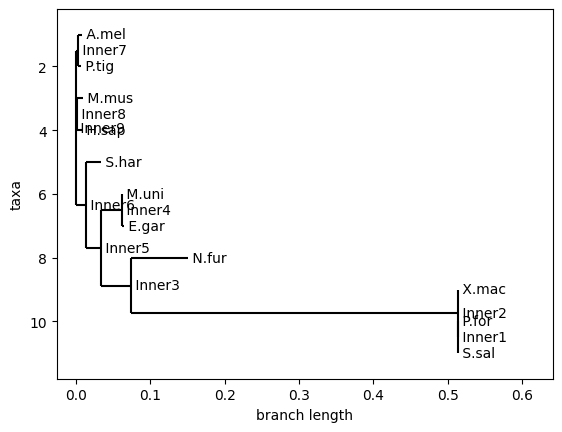

In [22]:
# Visualising the second tree

custom_mat_nj.ladderize()
Phylo.draw(custom_mat_nj)

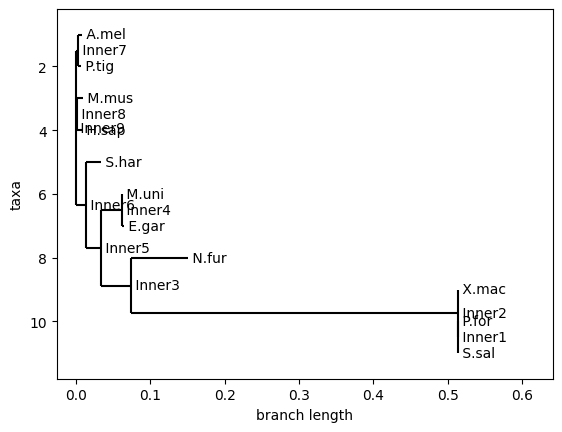

In [23]:
# We will also visualise the first neighbour-joining tree
# that was constructed using the raw MSA file

nj_tree.ladderize()
Phylo.draw(nj_tree)

We observe that there appears to be relatively little difference between the two trees.

The documentation for the packages used was obtained from the [Biopython website](https://biopython.org/wiki/Phylo).